<a href="https://colab.research.google.com/github/Fadelmuhammad013/Machine-learning/blob/main/04.%20Week%204/Compas_Score.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
from google.colab import files
uploaded = files.upload()


Saving compas-scores-two-years.csv to compas-scores-two-years (1).csv


In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, roc_curve
)
from sklearn.ensemble import RandomForestClassifier

In [44]:
df = pd.read_csv('compas-scores-two-years.csv')
print(df.shape)
df.head()


(7214, 53)


,id,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,...,v_decile_score,v_score_text,v_screening_date,in_custody,out_custody,priors_count.1,start,end,event,two_year_recid
0,1,miguel hernandez,miguel,hernandez,2013-08-14,Male,1947-04-18,69,Greater than 45,Other,...,1,Low,2013-08-14,2014-07-07,2014-07-14,0,0,327,0,0
1,3,kevon dixon,kevon,dixon,2013-01-27,Male,1982-01-22,34,25 - 45,African-American,...,1,Low,2013-01-27,2013-01-26,2013-02-05,0,9,159,1,1
2,4,ed philo,ed,philo,2013-04-14,Male,1991-05-14,24,Less than 25,African-American,...,3,Low,2013-04-14,2013-06-16,2013-06-16,4,0,63,0,1
3,5,marcu brown,marcu,brown,2013-01-13,Male,1993-01-21,23,Less than 25,African-American,...,6,Medium,2013-01-13,NaN,NaN,1,0,1174,0,0
4,6,bouthy pierrelouis,bouthy,pierrelouis,2013-03-26,Male,1973-01-22,43,25 - 45,Other,...,1,Low,2013-03-26,NaN,NaN,2,0,1102,0,0


In [45]:
# Ambil kolom penting
cols = [
    'age', 'age_cat', 'race', 'sex', 'priors_count',
    'juv_fel_count', 'juv_misd_count', 'juv_other_count',
    'c_charge_degree',  'two_year_recid'
]
df = df[cols].copy().dropna()

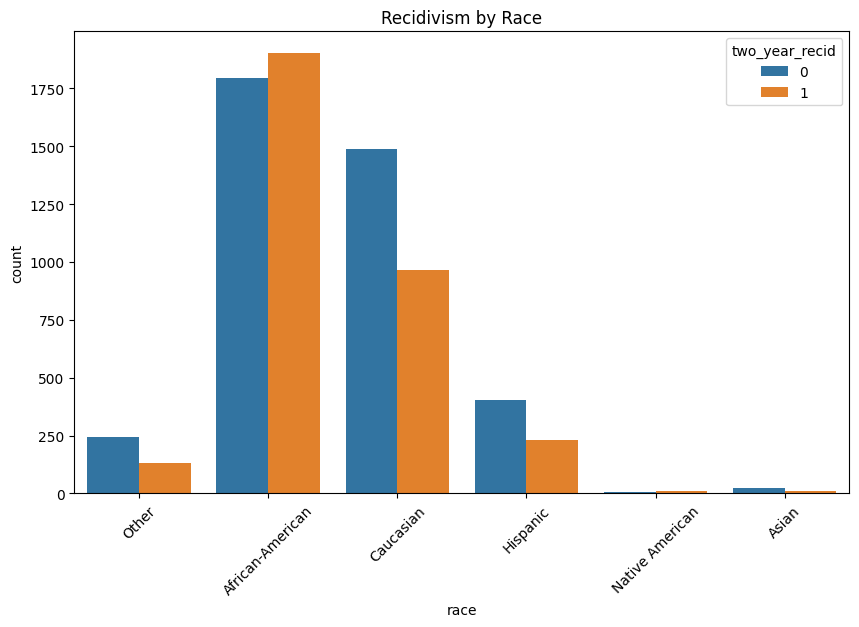

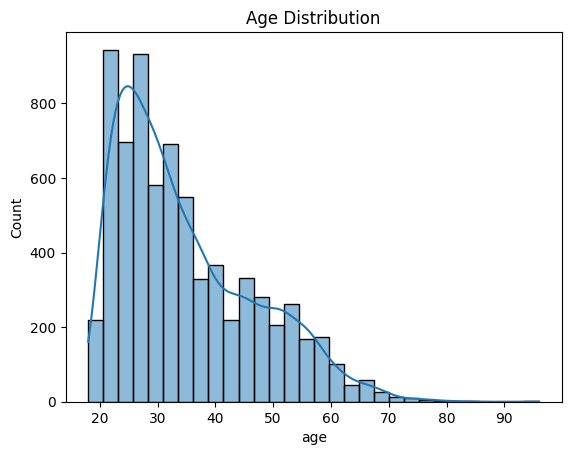

In [46]:
# Visualisasi
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='race', hue='two_year_recid')
plt.title('Recidivism by Race')
plt.xticks(rotation=45)
plt.show()

sns.histplot(df['age'], kde=True, bins=30)
plt.title("Age Distribution")
plt.show()

In [47]:
# Label Encoding
le = LabelEncoder()
df['race'] = le.fit_transform(df['race'])
df['sex'] = le.fit_transform(df['sex'])
df['age_cat'] = le.fit_transform(df['age_cat'])
df['c_charge_degree'] = le.fit_transform(df['c_charge_degree'])

In [48]:
# Split fitur dan target
X = df.drop('two_year_recid', axis=1)
y = df['two_year_recid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [49]:
# GridSearchCV untuk Random Forest
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'class_weight': ['balanced']
}

grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1
)


In [50]:
# Latih GridSearch
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'class_weight': ['balanced'],
                         'max_depth': [5, 10, None], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='roc_auc', verbose=1)

In [51]:
# Model terbaik
best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'class_weight': 'balanced', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}


In [52]:
# Prediksi
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]

# Evaluasi
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))


Accuracy: 0.6937644341801386
Precision: 0.6482412060301508
Recall: 0.673277661795407
F1 Score: 0.6605222734254992
ROC AUC: 0.7425698733726194


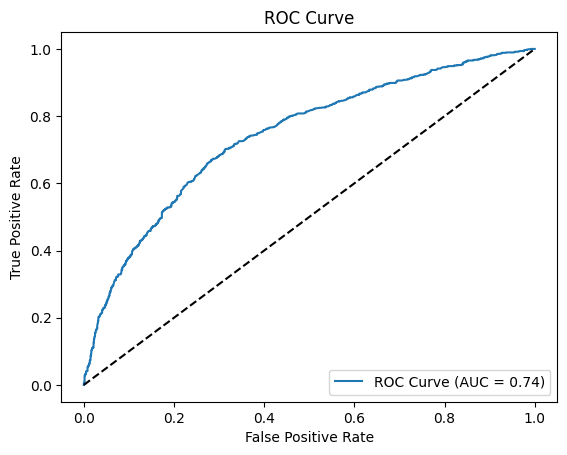

In [53]:
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(roc_auc_score(y_test, y_proba)))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


**Penjelasan Matematis Evaluasi Model**

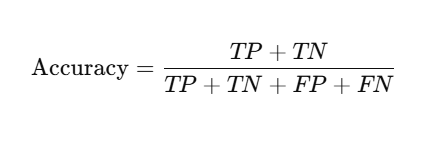

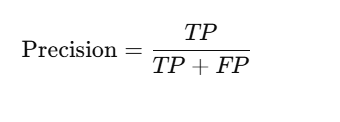

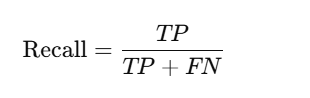

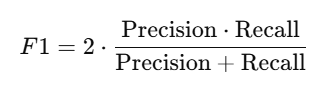

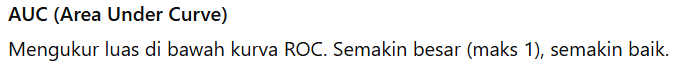